<a href="https://colab.research.google.com/github/acanonc/Analisis_datos/blob/main/U10_Actividad_entregable_Dataframes_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATAFRAMES CON PANDAS**

---



## **PRIMER ANÁLISIS DE DATOS**

> Taza de Cambio Representativa del Mercado TRM entre el 2014 y el 2022



In [5]:
!pip install sodapy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sodapy import Socrata
cliente = Socrata ("www.datos.gov.co", None)

result = cliente.get("32sa-8pi3")

datos = pd.DataFrame.from_records (result)

datos.head()

#Tipo de datos
datos.dtypes



valor            object
unidad           object
vigenciadesde    object
vigenciahasta    object
dtype: object

**LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS**

In [6]:
#Renombrar la columna "vigenciadesde"
datos = datos.rename( columns = {"vigenciadesde": "Año"})
datos = datos.rename( columns = {"valor": "Pesos"})


#Transformación del tipo de dato de la variable VALOR de un "object" a "int"
datos['Pesos'] = datos['Pesos'].astype(float)
datos['Pesos'] = datos['Pesos'].astype(int)

#Reducir la fecha de los datos
datos["Año"] = datos.Año.str.findall(r"\d{4}").str.get(0)

datos['Año'] = datos['Año'].astype(int)


#Borrar la columna "vigenciahasta" y "unidad"
del(datos['vigenciahasta'])
del(datos['unidad'])

datos

,Pesos,Año
0,4761,2022
1,4781,2022
2,4802,2022
3,4836,2022
4,4815,2022
...,...,...
995,1978,2014
996,1993,2014
997,1998,2014
998,2017,2014


**DATOS ESTADÍSTICOS**

In [7]:
#CALCULO DE LA MEDIA
media = datos.Pesos.mean()
print(f"La MEDIA de la Taza de Cambio Representativa del Mercado es de ${media} COL")

print("--------------------------------------------------")

#CALCULO DE LA MEDIANA
mediana = datos.Pesos.median()
print(f"La MEDIANA de la Taza de Cambio Representativa del Mercado es de ${mediana} COL")

print("--------------------------------------------------")

#CALCULO DE LA DESVIACIÓN ESTÁNDAR
desviacion_estandar = datos.Pesos.std()
print(f"La DESVIACIÓN ESTÁNDAR de la Taza de Cambio Representativa del Mercado es de {desviacion_estandar.round(2)}")

print("--------------------------------------------------")

#CALCULO DEL MÁXIMO VALOR
valor_maximo = datos.Pesos.max()
print(f"El VALOR MÁXIMO de la Taza de Cambio Representativa del Mercado es de ${valor_maximo} COL")

print("--------------------------------------------------")

#CALCULO DEL MÍNIMO VALOR
valor_minimo = datos.Pesos.min()
print(f"El VALOR MÍNIMO de la Taza de Cambio Representativa del Mercado es de ${valor_minimo} COL")

print("--------------------------------------------------")

#CALCULO DEL RANGO
rango = valor_maximo - valor_minimo
print(f"El RANGO de la Taza de Cambio Representativa del Mercado es {rango}")

print("--------------------------------------------------")

#RESUMEN DE DATOS NÚMERICOS
print(f"Resumen de datos: \n Media: ${media} COL \n Mediana: ${mediana} COL \n Desviación Estándar: {desviacion_estandar} \n Máximo Valor: ${valor_maximo} COL \n Mínimo Valor: ${valor_minimo} COL \n Rango: ${rango} COL")



La MEDIA de la Taza de Cambio Representativa del Mercado es de $3041.867 COL
--------------------------------------------------
La MEDIANA de la Taza de Cambio Representativa del Mercado es de $2972.0 COL
--------------------------------------------------
La DESVIACIÓN ESTÁNDAR de la Taza de Cambio Representativa del Mercado es de 730.69
--------------------------------------------------
El VALOR MÁXIMO de la Taza de Cambio Representativa del Mercado es de $5061 COL
--------------------------------------------------
El VALOR MÍNIMO de la Taza de Cambio Representativa del Mercado es de $1846 COL
--------------------------------------------------
El RANGO de la Taza de Cambio Representativa del Mercado es 3215
--------------------------------------------------
Resumen de datos: 
 Media: $3041.867 COL 
 Mediana: $2972.0 COL 
 Desviación Estándar: 730.6922036038208 
 Máximo Valor: $5061 COL 
 Mínimo Valor: $1846 COL 
 Rango: $3215 COL


**INFORMACIÓN GENERAL DEL DATASET**

In [8]:
#INFORMACIÓN GENERAL DEL DATASET
datos.info()

datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pesos   1000 non-null   int64
 1   Año     1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


,Pesos,Año
0,4761,2022
1,4781,2022
2,4802,2022
3,4836,2022
4,4815,2022
...,...,...
995,1978,2014
996,1993,2014
997,1998,2014
998,2017,2014


**REPRESENTACIONES GRÁFICAS**


*GRÁFICA 1: LINEAL*

> La gráfica permide evidenciar el incremento que ha tenido la taza de cambio de la modena colombiana con respecto al dolar. Entre 2015 y 2018 hubo una pequeña estabilidad en la taza de cambio con algunos picos a los largo de ese periodo. Adicionalmente, es posible ver el incerremento acelerado que a tenido el peso colombiano en el 2022, pasando de 4.000 a 5.000.



<Axes: title={'center': 'Taza de Cambio Representativa del Mercado TRM'}, xlabel='Año'>

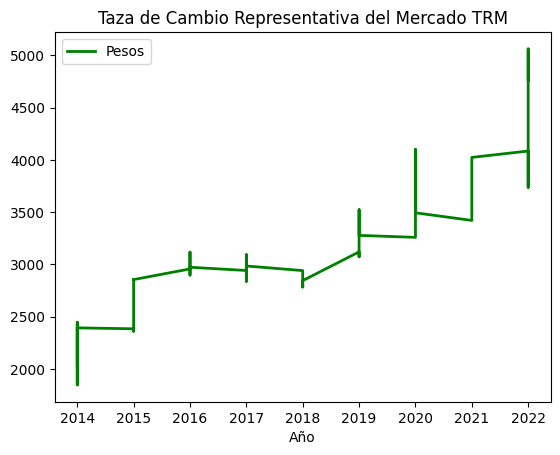

In [9]:
#REPRESENTACIONES GRÁFICAS
#Gráfica 1
datos.plot(x = 'Año', y = 'Pesos', color = 'green', linewidth = 2, title = 'Taza de Cambio Representativa del Mercado TRM')


*GRÁFICA 2: BOXPLOT*

> La boxplot permite ver los datos de una forma novedosa y diferente a la que normalmente se presenta. A partir de la gráfica es posible identificar que la media de los datos es aproximadamente 3.000 pesos colombianos y que aproximadamente el 50% de los datos se ubican entre 2.500 y 3.600. Adicionalmente es posible decir que el valor mínimo que adquiere el peso colombiano es de menos de 2.000 y el valor máximo se encuentra por encima de 5.000.



<Axes: >

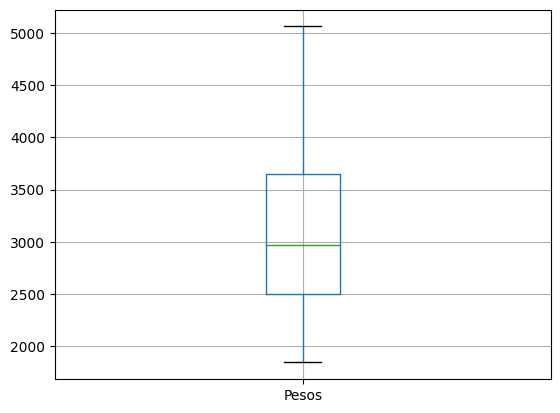

In [10]:
#Gráfica 2
datos.boxplot('Pesos')

##**SEGUNDO ANÁLISIS DE DATOS**

> Aplicación de dosis de vacuna contra COVID-19 en el 2021



In [11]:
result_2 = cliente.get("prrv-jnta")

datos_2 = pd.DataFrame.from_records (result_2)

datos_2

,fecha_aplicaci_n,a_o,cod_territorio,nom_territorio,cantidad_dosis_aplicadas,fecha_corte
0,2021-02-17T00:00:00.000,2021,23,Córdoba,6,2023-02-28T00:00:00.000
1,2021-02-17T00:00:00.000,2021,70,Sucre,12,2023-02-28T00:00:00.000
2,2021-02-18T00:00:00.000,2021,05,Antioquia,1019,2023-02-28T00:00:00.000
3,2021-02-18T00:00:00.000,2021,08001,Barranquilla,631,2023-02-28T00:00:00.000
4,2021-02-18T00:00:00.000,2021,11,Bogotá,5486,2023-02-28T00:00:00.000
...,...,...,...,...,...,...
995,2021-03-23T00:00:00.000,2021,47,Magdalena,1070,2023-02-28T00:00:00.000
996,2021-03-23T00:00:00.000,2021,47001,Santa Marta,463,2023-02-28T00:00:00.000
997,2021-03-23T00:00:00.000,2021,50,Meta,611,2023-02-28T00:00:00.000
998,2021-03-23T00:00:00.000,2021,52,Nariño,2552,2023-02-28T00:00:00.000


**LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS**

In [12]:
#LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS

#Eliminar datos nulos
datos_2 = datos_2.dropna(axis = 0, how = 'any')

#Borrar la columna "vigenciahasta" y "unidad"
del(datos_2['fecha_corte'])
del(datos_2['cod_territorio'])
del(datos_2['fecha_aplicaci_n'])

#Renombrar la columna "vigenciadesde"
datos_2 = datos_2.rename( columns = {"a_o": "Año"})
datos_2

#Tipo de datos
datos_2.dtypes

#Transformación del tipo de datos de un "object" a "int"
datos_2['cantidad_dosis_aplicadas'] = datos_2['cantidad_dosis_aplicadas'].astype(int)
datos_2.dtypes

Año                         object
nom_territorio              object
cantidad_dosis_aplicadas     int64
dtype: object

**DATOS ESTADÍSTICOS**

In [13]:
#DATOS ESTADÍSTICOS

#Calculo de la media
media_2 = datos_2.cantidad_dosis_aplicadas.mean()
print(f"La MEDIA de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de {media_2}")

#Calculo de la mediana
mediana_2 = datos_2.cantidad_dosis_aplicadas.median()
print(f"La MEDIANA de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de {mediana_2}")

#Calculo de la desviación estándar
desviacion_estandar_2 =  datos_2.cantidad_dosis_aplicadas.std()
print(f"La DESVIACIÓN ESTÁNDAR de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de {desviacion_estandar_2}")

#Calculo del maxímo valor
valor_maximo_2 = datos_2.cantidad_dosis_aplicadas.max()
print(f"El VALOR MÁXIMO de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de {valor_maximo_2}")

#Calculo del mínimo valor
valor_minimo_2 = datos_2.cantidad_dosis_aplicadas.min()
print(f"El VALOR MÍNIMO de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de {valor_minimo_2}")

#Calculo del rango
rango_2 = valor_maximo_2 - valor_minimo_2
print(f"El RANGO de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de {rango_2}")

#Resumen de datos númericos
print(f"Resumen de datos: \n Media: {media_2} \n Mediana: {mediana_2} \n Desviación Estándar: {desviacion_estandar_2} \n Máximo Valor: {valor_maximo_2} \n Mínimo Valor: {valor_minimo_2} \n Rango: {rango_2}")


La MEDIA de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de 1283.486
La MEDIANA de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de 529.0
La DESVIACIÓN ESTÁNDAR de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de 2398.8794155301457
El VALOR MÁXIMO de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de 24445
El VALOR MÍNIMO de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de 1
El RANGO de la cantidad de dosis de vacunas contra el COVID-19 acplicadas en 2021 es de 24444
Resumen de datos: 
 Media: 1283.486 
 Mediana: 529.0 
 Desviación Estándar: 2398.8794155301457 
 Máximo Valor: 24445 
 Mínimo Valor: 1 
 Rango: 24444


**INFORMACIÓN GENERAL DEL DATASET**

In [14]:
#INFORMACIÓN GENERAL DEL DATASET
datos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       1000 non-null   object
 1   nom_territorio            1000 non-null   object
 2   cantidad_dosis_aplicadas  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


**AGRUPACIÓN DE DATOS**

In [15]:
#AGRUPACIÓN de datos
agrupacion = datos_2.groupby(datos_2['nom_territorio']).sum()[["cantidad_dosis_aplicadas"]]

print(agrupacion)

                          cantidad_dosis_aplicadas
nom_territorio                                    
Amazonas                                     23674
Antioquia                                   164797
Arauca                                        2830
Atlántico                                    22563
Barranquilla                                 44925
Bogotá                                      254422
Bolívar                                      29840
Boyacá                                       39478
Buenaventura                                  1750
Caldas                                       29728
Caquetá                                       7367
Cartagena                                    31395
Casanare                                      7280
Cauca                                        23367
Cesar                                        21611
Chocó                                         4994
Cundinamarca                                 83151
Córdoba                        

<ipython-input-15-6af336ac9c1d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupacion = datos_2.groupby(datos_2['nom_territorio']).sum()[["cantidad_dosis_aplicadas"]]


**TABLA PIVOTE**

In [16]:
#Tabla Pivote
tabla_pivote = datos_2.pivot_table(values = "cantidad_dosis_aplicadas", index =['nom_territorio'], aggfunc= 'count')
print(tabla_pivote)

                          cantidad_dosis_aplicadas
nom_territorio                                    
Amazonas                                        25
Antioquia                                       33
Arauca                                          26
Atlántico                                       29
Barranquilla                                    34
Bogotá                                          32
Bolívar                                         24
Boyacá                                          30
Buenaventura                                    21
Caldas                                          26
Caquetá                                         26
Cartagena                                       33
Casanare                                        27
Cauca                                           24
Cesar                                           31
Chocó                                           23
Cundinamarca                                    30
Córdoba                        

**REPRESENTACIONES GRÁFICAS**

*GRÁFICA 1*

> La gráfica en el eje x por defecto solo presenta algunos de los departamentos que se encuentran en la agrupación. Igualmente es posible ver que las ciudades con mayor npumero de vaciones fue Bogotá superando las 250.000 dosis. Caqueta y Choco fueron unas de las cuides donde el nivel de vacunación fue bajo en 2021.



Text(0, 0.5, 'Cantidad de vacunados')

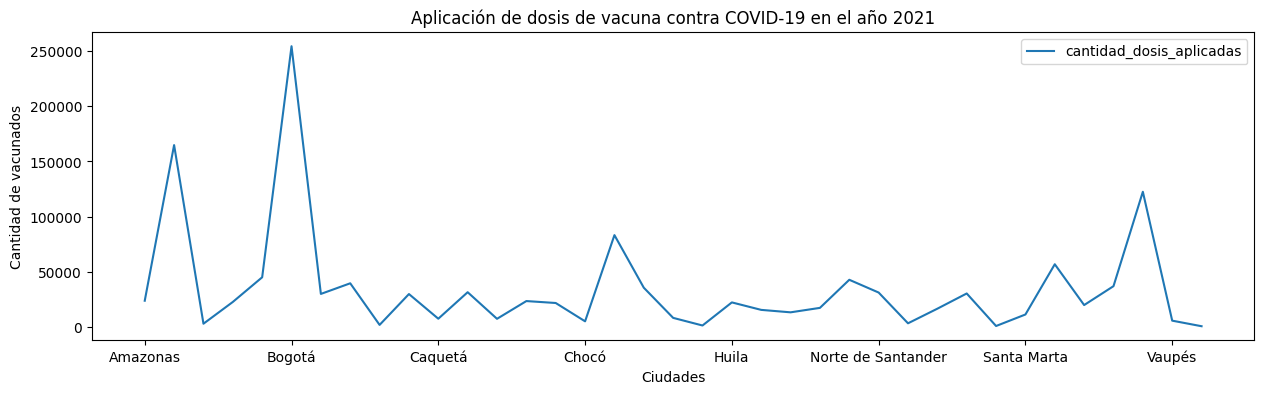

In [19]:
agrupacion.plot(figsize = (15, 4), title = "Aplicación de dosis de vacuna contra COVID-19 en el año 2021")
plt.xlabel('Ciudades')
plt.ylabel('Cantidad de vacunados')

*GRÁFICA 2*

> En la gráfica que se optuvo de la tabla de pivote se encontró que la cantidad de jornadas de vacunación realizadas en el país a lo largo del 2021 estuvo entre 21 a 32 jornadas.



Text(0, 0.5, 'Jornadas de vacunación')

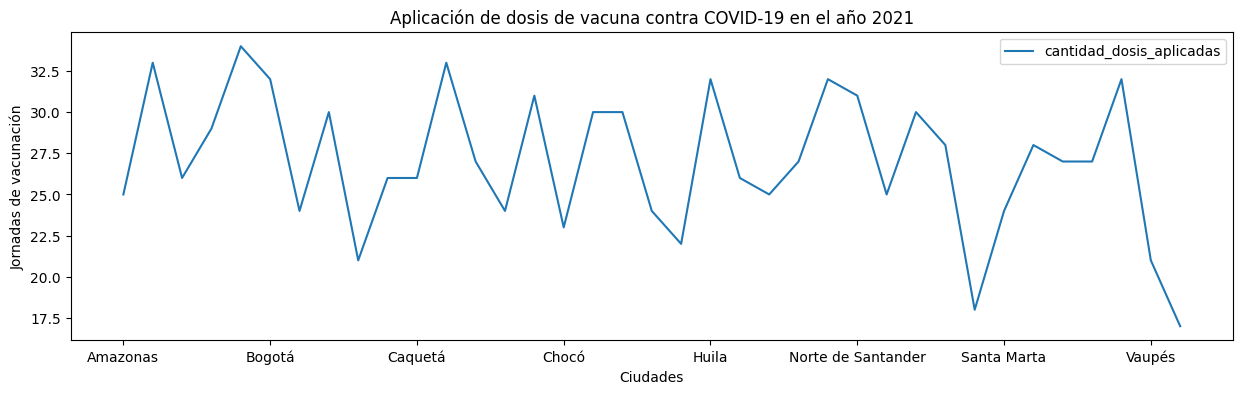

In [20]:
tabla_pivote.plot(figsize = (15, 4), title = "Aplicación de dosis de vacuna contra COVID-19 en el año 2021")
plt.xlabel('Ciudades')
plt.ylabel('Jornadas de vacunación')